# TASK 1

In [3]:
%pip install -- matplotlib

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\pradipta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
Shipment_dataset = pd.read_csv(r'D:\Python - Problem Solving\Shipment_Dataset.csv')

In [6]:
Shipment_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Shipment ID                   50000 non-null  object 
 1   Company Name                  50000 non-null  object 
 2   Source Location               50000 non-null  object 
 3   Destination Location          50000 non-null  object 
 4   Source Latitude               50000 non-null  float64
 5   Source Longitude              50000 non-null  float64
 6   Destination Latitude          50000 non-null  float64
 7   Destination Longitude         50000 non-null  float64
 8   Distance (km)                 50000 non-null  float64
 9   Category                      50000 non-null  object 
 10  No. of Items                  50000 non-null  int64  
 11  Package Weight (kg)           50000 non-null  float64
 12  Package Volume (cc)           50000 non-null  float64
 13  P

In [7]:
Shipment_dataset.drop_duplicates(inplace=True)
Shipment_dataset.dropna(inplace=True)

In [8]:
Shipment_dataset.head()

,Shipment ID,Company Name,Source Location,Destination Location,Source Latitude,Source Longitude,Destination Latitude,Destination Longitude,Distance (km),Category,...,Shipment Priority,Shipment Mode,Fragile,Customer Rating,Expected Delivery Time (hrs),Actual Delivery Time (hrs),Delay (hrs),Date of Shipment,Status,Payment Method
0,SHP100000,DHL,Mumbai,Delhi,19.0760,72.8777,28.6139,77.2090,1186.17,Apparel,...,Express,Air,True,5,19.77,55.67,92.96,2023-05-11,Delivered,Prepaid
1,SHP100001,BlueDart,Jaipur,Ahmedabad,26.9124,75.7873,23.0225,72.5714,159.70,Electronics,...,Normal,Air,True,4,2.66,142.45,47.48,2023-02-28,Delivered,COD
3,SHP100003,UPS,Hyderabad,Mumbai,17.3850,78.4867,19.0760,72.8777,2072.89,Medicines,...,Express,Road,True,5,34.55,49.20,87.76,2023-09-21,In-Transit,Prepaid
4,SHP100004,FedEx,Pune,Ahmedabad,18.5204,73.8567,23.0225,72.5714,199.73,Medicines,...,Normal,Road,False,2,3.33,99.39,85.70,2023-02-13,Delayed,COD
5,SHP100005,FedEx,Pune,Bangalore,18.5204,73.8567,12.9716,77.5946,2824.55,Furniture,...,Normal,Air,False,1,47.08,89.40,37.83,2023-08-01,Delivered,Prepaid


* ## Which company is most cost-efficient per km? 

In [9]:
Shipment_dataset['Cost_per_km'] = Shipment_dataset['Total Cost (in Rs.)'] / Shipment_dataset['Distance (km)']
Cost_eff = Shipment_dataset.groupby('Company Name')['Cost_per_km'].mean().sort_values()
print("Cost-Efficiency (Cost/km) by Company:\n", Cost_eff)

Cost-Efficiency (Cost/km) by Company:
 Company Name
FedEx        2.647415
DHL          2.672789
Delhivery    2.677220
UPS          2.728397
BlueDart     2.728632
Name: Cost_per_km, dtype: float64


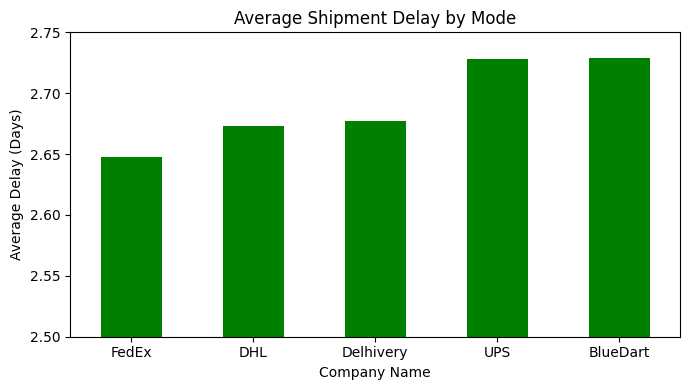

In [10]:
plt.figure(figsize=(7,4))
Cost_eff.plot(kind='bar', color='green')
plt.ylim(2.5,2.75)
plt.title("Average Shipment Delay by Mode")
plt.ylabel("Average Delay (Days)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

* ## Which shipment modes are most delayed? 

In [11]:
Most_delayed = Shipment_dataset.groupby('Shipment Priority')['Delay (hrs)'].mean().sort_values(ascending=False)
print("Most delayed Shipment Mode:\n", Most_delayed)

Most delayed Shipment Mode:
 Shipment Priority
Express     51.916245
Same-day    51.643764
Normal      51.506140
Name: Delay (hrs), dtype: float64


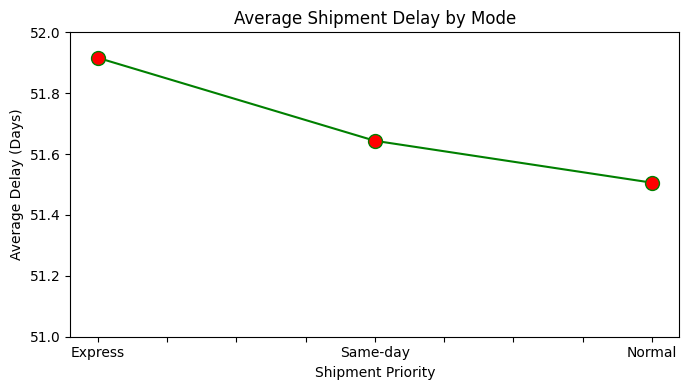

In [12]:
plt.figure(figsize=(7,4))
Most_delayed.plot(kind='line', color='green', marker='o', ms=10, mfc = 'r')
plt.ylim(51, 52)
plt.title("Average Shipment Delay by Mode")
plt.ylabel("Average Delay (Days)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

* ##  Which regions have the highest logistic costs?

In [13]:
Shipment_dataset['Logistic_cost'] = Shipment_dataset['Shipment Cost (in Rs.)'] + Shipment_dataset['Insurance Cost (in Rs.)']
Reg_high_LC = Shipment_dataset.groupby('Source Location')['Logistic_cost'].mean().sort_values(ascending=False)
print("Regions With Highest Logistic COst:\n", Reg_high_LC)

Regions With Highest Logistic COst:
 Source Location
Pune         1102.634420
Hyderabad    1102.432972
Ahmedabad    1100.053492
Chennai      1099.063608
Bangalore    1098.228518
Jaipur       1095.788347
Lucknow      1095.712838
Delhi        1095.251792
Mumbai       1094.680591
Kolkata      1084.325076
Name: Logistic_cost, dtype: float64


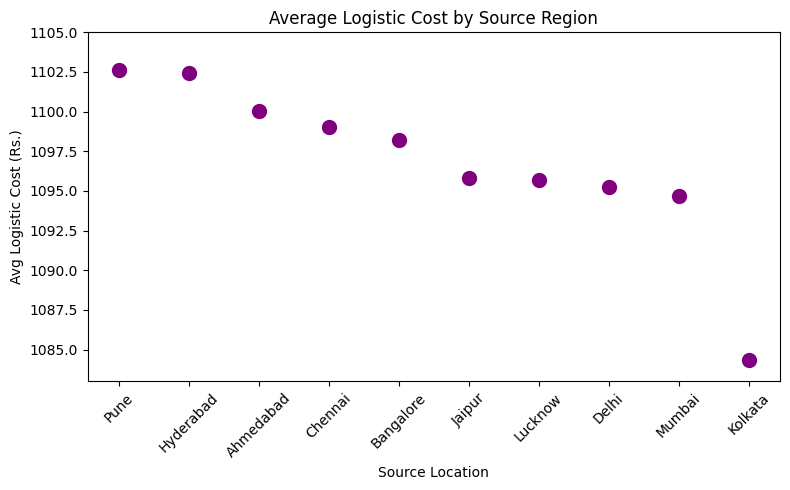

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(Reg_high_LC.index, Reg_high_LC.values, color='purple', s=100)
plt.ylim(1083, 1105)
plt.title("Average Logistic Cost by Source Region")
plt.xlabel("Source Location")
plt.ylabel("Avg Logistic Cost (Rs.)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* ## Which product categories result in the most returns or delays? 

In [15]:
# delayed Dataset

delayed_df = Shipment_dataset[Shipment_dataset['Status'] == 'Delayed']

cat_del = delayed_df.groupby('Category').size().sort_values(ascending=False)

print("Product Categories Resulting in Most Delays:\n", cat_del)

# Returned Dataset

Returned_df = Shipment_dataset[Shipment_dataset['Status'] == 'Returned']

cat_ret = Returned_df.groupby('Category').size().sort_values(ascending=False)

print("\nProduct Categories Resulting in Most Returned:\n", cat_ret)


Product Categories Resulting in Most Delays:
 Category
Apparel        1730
Furniture      1693
Documents      1640
Electronics    1585
Medicines      1577
dtype: int64

Product Categories Resulting in Most Returned:
 Category
Electronics    1675
Furniture      1641
Apparel        1637
Documents      1634
Medicines      1608
dtype: int64


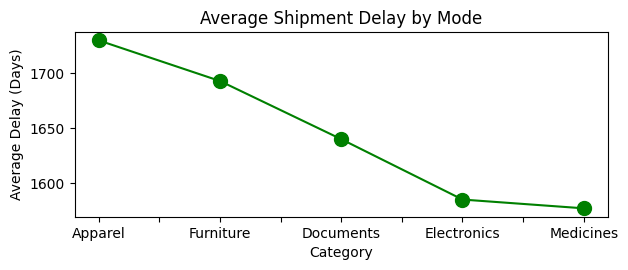

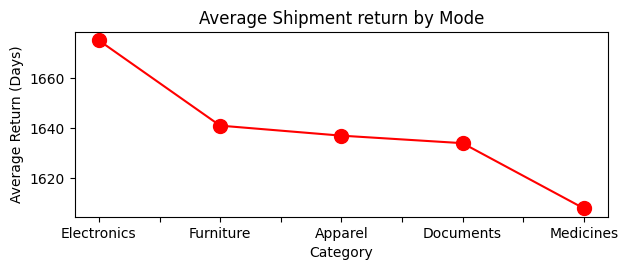

In [16]:
plt.subplot(2,1,1)
cat_del.plot(kind='line', color='green', marker='o', ms=10)
plt.title("Average Shipment Delay by Mode")
plt.ylabel("Average Delay (Days)")
plt.tight_layout()
plt.show()

plt.subplot(2,1,2)
cat_ret.plot(kind='line', color='red', marker='o', ms=10)
plt.title("Average Shipment return by Mode")
plt.ylabel("Average Return (Days)")
plt.tight_layout()
plt.show()

# TASK 2

## 1. Descriptive Analytics (What happened?) 

* ### What is the average shipment cost by company and mode?

In [17]:
avg_cost_by_company_mode = Shipment_dataset.groupby(['Company Name', 'Shipment Mode'])['Shipment Cost (in Rs.)'].mean()
print(avg_cost_by_company_mode)

Company Name  Shipment Mode
BlueDart      Air              1066.836630
              Rail             1095.869281
              Road             1067.750903
              Sea              1078.761182
DHL           Air              1073.964784
              Rail             1089.594791
              Road             1072.510595
              Sea              1079.347122
Delhivery     Air              1062.160232
              Rail             1069.126222
              Road             1076.134220
              Sea              1079.361605
FedEx         Air              1073.682691
              Rail             1073.981113
              Road             1069.366432
              Sea              1064.608099
UPS           Air              1072.529071
              Rail             1081.459675
              Road             1074.143291
              Sea              1074.210176
Name: Shipment Cost (in Rs.), dtype: float64


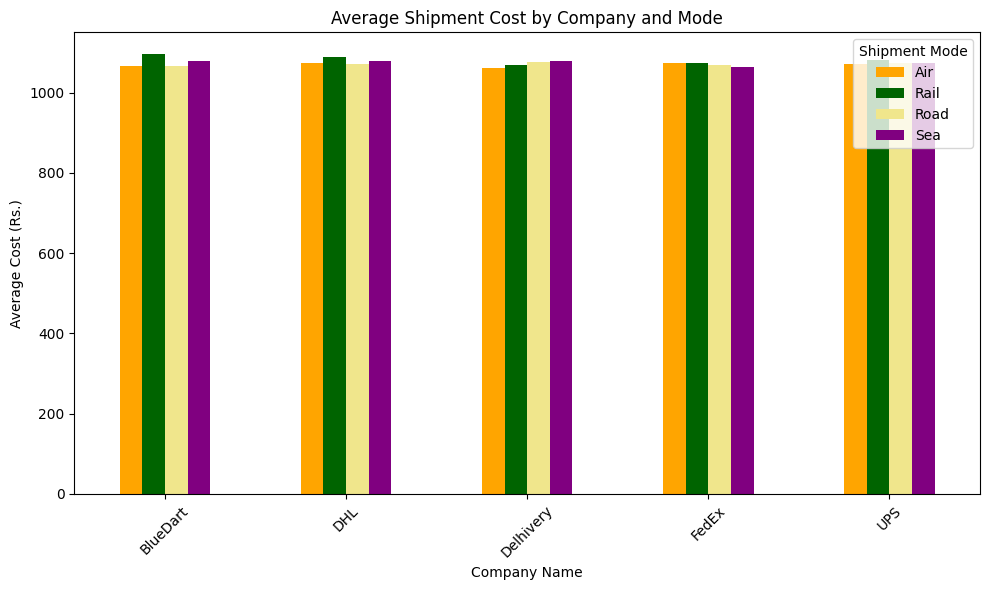

In [18]:
# Unstack to reshape for grouped bar chart
avg_cost_by_company_mode_unstacked = avg_cost_by_company_mode.unstack()

custom_colors = ['orange', 'darkgreen', 'khaki', 'purple']

avg_cost_by_company_mode_unstacked.plot(kind='bar', figsize=(10, 6), color= custom_colors)
plt.title("Average Shipment Cost by Company and Mode")
plt.ylabel("Average Cost (Rs.)")
plt.xticks(rotation=45)
plt.legend(title='Shipment Mode')
plt.tight_layout()
plt.show()

* ### What are the top 5 most common shipment routes? 

In [19]:
if 'Source Location' in Shipment_dataset.columns and 'Destination Location' in Shipment_dataset.columns:
    Shipment_dataset['Route'] = Shipment_dataset['Source Location'] + ' -> ' + Shipment_dataset['Destination Location']
    top_5_routes = Shipment_dataset['Route'].value_counts().head(5)

print(top_5_routes)


Route
Pune -> Chennai           413
Lucknow -> Ahmedabad      408
Bangalore -> Hyderabad    400
Hyderabad -> Delhi        397
Pune -> Lucknow           396
Name: count, dtype: int64


* ### What is the distribution of delays across all companies? 

In [20]:
dist_delays = Shipment_dataset.groupby('Company Name')['Delay (hrs)'].describe()
print(dist_delays)

               count       mean        std  min      25%     50%     75%  \
Company Name                                                               
BlueDart      4908.0  51.552610  29.260591  0.0  29.2625  52.995  76.065   
DHL           6639.0  51.881199  29.215503  0.0  29.6850  53.790  76.655   
Delhivery     6537.0  51.358461  29.130048  0.0  29.4600  52.670  76.080   
FedEx         8296.0  52.081237  29.305590  0.0  29.7900  53.650  76.850   
UPS           6614.0  51.210599  29.341767  0.0  28.6925  52.080  76.170   

                 max  
Company Name          
BlueDart       99.95  
DHL           100.00  
Delhivery      99.97  
FedEx          99.99  
UPS           100.00  


* ### How many shipments were returned or delayed in each month? 

In [21]:
import pandas as pd

# Ensure Date of Shipment is in datetime format
Shipment_dataset['Date of Shipment'] = pd.to_datetime(Shipment_dataset['Date of Shipment'], errors='coerce')

# Filter rows where shipment was returned or delayed
returned_or_delayed = Shipment_dataset[(Shipment_dataset['Status'] == 'Returned') | (Shipment_dataset['Delay (hrs)'] > 0)]

# Extract the shipment month
returned_or_delayed['Month'] = returned_or_delayed['Date of Shipment'].dt.to_period('M')

# Count number of such shipments per month
monthly_returns_delays = returned_or_delayed.groupby('Month').size()

print(monthly_returns_delays)


Month
2023-01    2667
2023-02    2360
2023-03    2735
2023-04    2515
2023-05    2582
2023-06    2604
2023-07    2545
2023-08    2719
2023-09    2561
2023-10    2612
2023-11    2543
2023-12    2702
Freq: M, dtype: int64


C:\Users\pradipta\AppData\Local\Temp\ipykernel_11864\1894014951.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returned_or_delayed['Month'] = returned_or_delayed['Date of Shipment'].dt.to_period('M')


## 2. Diagnostic Analytics (Why did it happen?) 

* ### Why are delays more frequent in certain cities or modes? 

In [22]:
delay_by_city_mode = Shipment_dataset[Shipment_dataset['Delay (hrs)'] > 0].groupby(['Source Location', 'Shipment Mode']).size()
print(delay_by_city_mode)

Source Location  Shipment Mode
Ahmedabad        Air               619
                 Rail              657
                 Road             1488
                 Sea               285
Bangalore        Air               610
                 Rail              636
                 Road             1572
                 Sea               314
Chennai          Air               619
                 Rail              600
                 Road             1530
                 Sea               325
Delhi            Air               673
                 Rail              601
                 Road             1441
                 Sea               283
Hyderabad        Air               617
                 Rail              585
                 Road             1526
                 Sea               326
Jaipur           Air               573
                 Rail              594
                 Road             1479
                 Sea               303
Kolkata          Air             

In [23]:
# Delays are due to many reasons it can be due to bad weather, poor transportation services, poor networking. 
# This should be shorted accordingly to make the process more efficient and reduce the delay timings.

* ### Why do some companies have lower profits per shipment? 

In [24]:
profit_per_shipment = Shipment_dataset.groupby('Company Name')['Profit (in Rs.)'].mean().sort_values(ascending=False).round(2)
print(profit_per_shipment)

Company Name
FedEx        195.68
UPS          195.67
BlueDart     195.48
DHL          195.47
Delhivery    194.80
Name: Profit (in Rs.), dtype: float64


In [25]:
# Some companies have lower profit per shipment due to improper management of Package Cost, Shipment Cost, Insurance Cost. 
# They should work on lowering these costs in order tomake larger profits 

* ### What factors contribute to high total shipment cost? 

In [26]:
correlation_with_cost = Shipment_dataset.corr(numeric_only=True)['Shipment Cost (in Rs.)'].sort_values(ascending=False)
print(correlation_with_cost)

Shipment Cost (in Rs.)          1.000000
Logistic_cost                   0.999429
Total Cost (in Rs.)             0.512436
Profit (in Rs.)                 0.485917
Cost_per_km                     0.121682
Actual Delivery Time (hrs)      0.010335
Delay (hrs)                     0.008222
Package Cost (in Rs.)           0.002991
Insurance Cost (in Rs.)         0.000883
Destination Latitude            0.000550
Destination Longitude          -0.000430
Package Weight (kg)            -0.001171
No. of Items                   -0.001330
Expected Delivery Time (hrs)   -0.001978
Distance (km)                  -0.001978
Package Volume (cc)            -0.002148
Fragile                        -0.004654
Source Latitude                -0.005320
Customer Rating                -0.005391
Source Longitude               -0.009719
Name: Shipment Cost (in Rs.), dtype: float64


In [ ]:
# Logistic Cost contributes highest to the shipment cost. 
# So one should focus on reducing Logistic Cost and Cost per km in order to reduce logistic cost

* ### Why do fragile or high-value shipments experience issues? 

In [ ]:
high_value_issues = Shipment_dataset[
    (Shipment_dataset['Total Cost (in Rs.)'] > Shipment_dataset['Total Cost (in Rs.)'].median()) 
    &
    (Shipment_dataset['Delay (hrs)'] > 0)]

low_value_issues = Shipment_dataset[
    (Shipment_dataset['Total Cost (in Rs.)'] < Shipment_dataset['Total Cost (in Rs.)'].median()) 
    &
    (Shipment_dataset['Delay (hrs)'] > 0)]

avg_delay_high_value = high_value_issues.groupby('Company Name')['Delay (hrs)'].mean()
avg_delay_low_value = low_value_issues.groupby('Company Name')['Delay (hrs)'].mean()

print("high-value shipments\n",avg_delay_high_value)
print("\nlow-value shipments\n",avg_delay_low_value)

high-value shipments
 Company Name
BlueDart     55.073027
DHL          56.225093
Delhivery    55.828269
FedEx        56.565990
UPS          54.666792
Name: Delay (hrs), dtype: float64

low-value shipments
 Company Name
BlueDart     56.056003
DHL          56.280571
Delhivery    55.502755
FedEx        55.673896
UPS          55.969002
Name: Delay (hrs), dtype: float64


In [ ]:
# No they dont face much issues.
# It is evident from the delay time per company

## 3. Predictive Analytics (What will happen?) 

* ### Will a given shipment be delayed based on current features? 

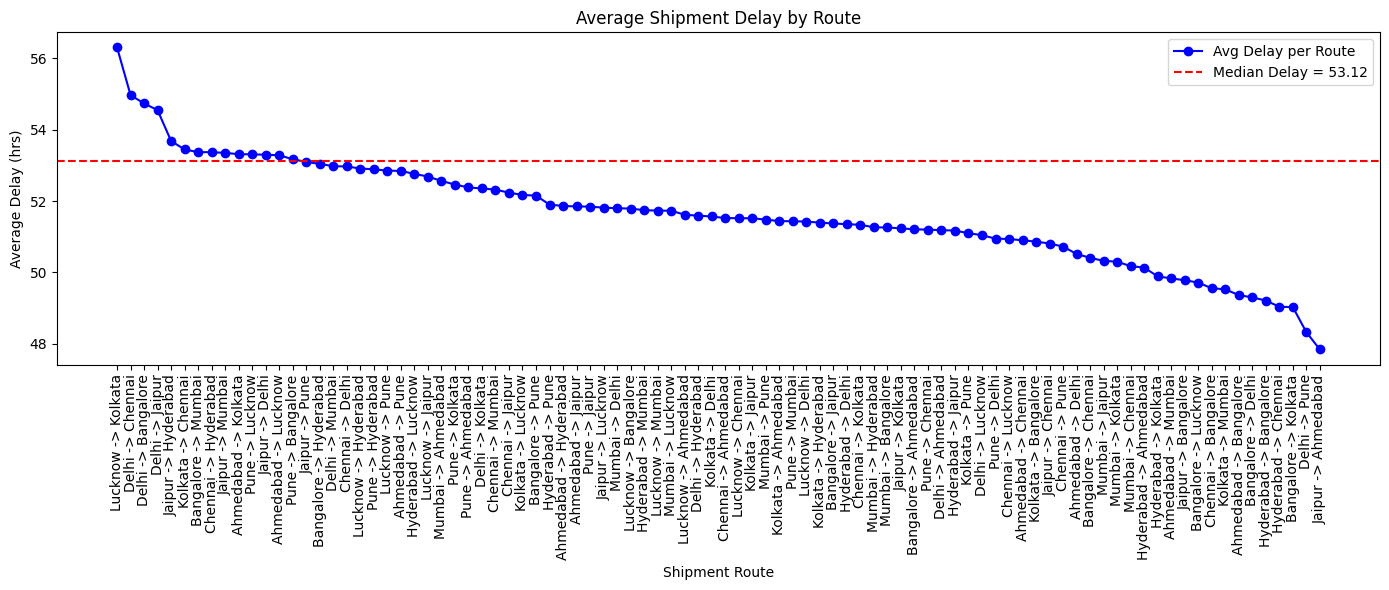

In [28]:
route_delay = Shipment_dataset.groupby('Route')['Delay (hrs)'].mean().sort_values(ascending=False)

# Calculate median delay across all shipments
delay_median = Shipment_dataset['Delay (hrs)'].median()

# Plot average delay per route
plt.figure(figsize=(14, 6))
plt.plot(route_delay.index, route_delay.values, marker='o', linestyle='-', color='blue', label='Avg Delay per Route')
plt.axhline(delay_median, color='red', linestyle='--', label=f'Median Delay = {delay_median:.2f}')

plt.title("Average Shipment Delay by Route")
plt.xlabel("Shipment Route")
plt.ylabel("Average Delay (hrs)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


* ### What is the expected profit for a new shipment?

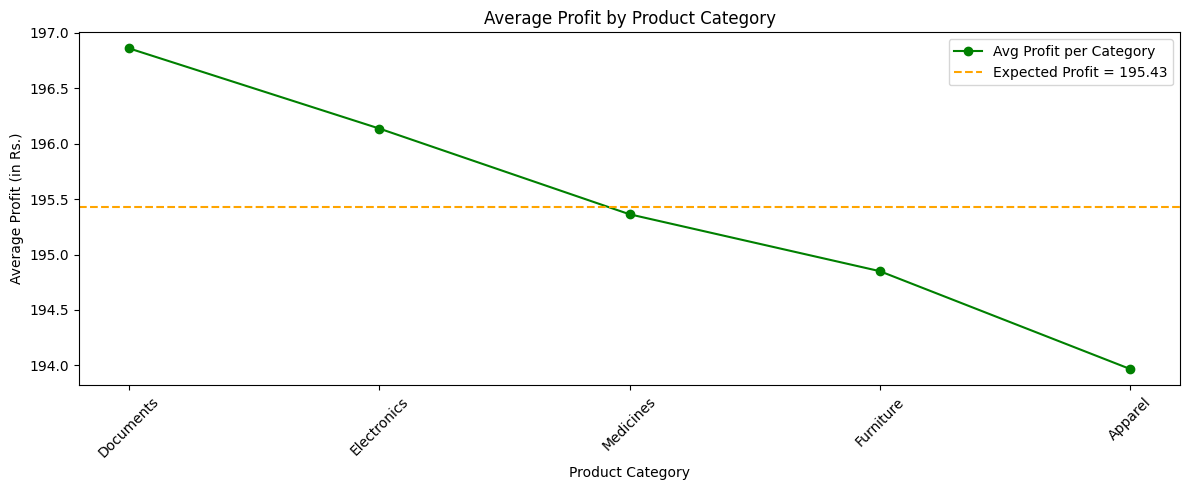

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate overall expected profit
expected_profit = Shipment_dataset['Profit (in Rs.)'].mean()

# Group by Product Category and compute average profit
category_profit = Shipment_dataset.groupby('Category')['Profit (in Rs.)'].mean().sort_values(ascending=False)

# Plot average profit per category with expected profit line
plt.figure(figsize=(12, 5))
plt.plot(category_profit.index, category_profit.values, marker='o', color='green', label='Avg Profit per Category')
plt.axhline(expected_profit, color='orange', linestyle='--', label=f'Expected Profit = {expected_profit:.2f}')

plt.title("Average Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Profit (in Rs.)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



* ### Can we predict the customer rating based on delivery performance? 

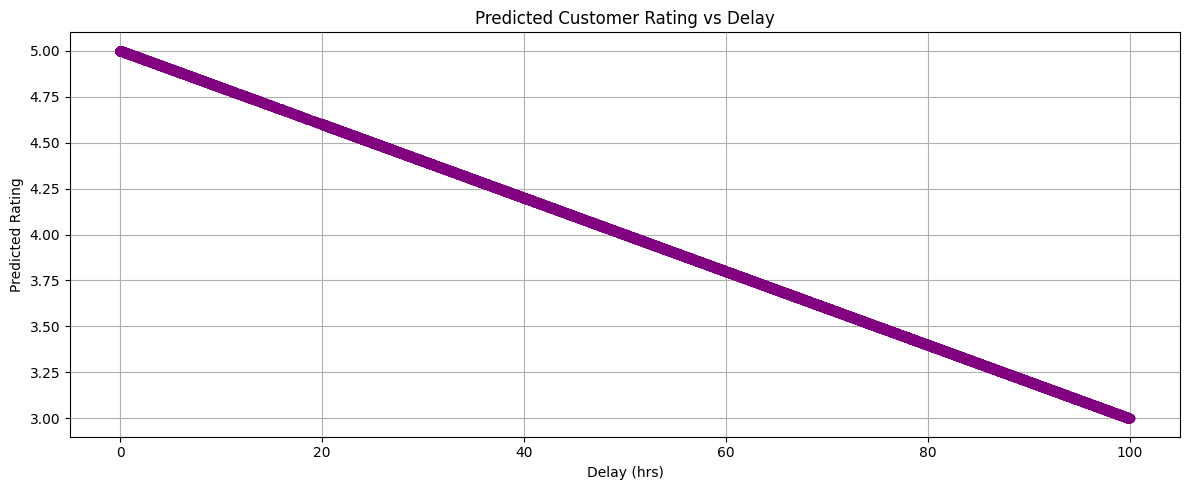

In [30]:
# Predict customer rating: inversely proportional to delay
max_delay = Shipment_dataset['Delay (hrs)'].max()
Shipment_dataset['Predicted Customer Rating'] = 5 - (Shipment_dataset['Delay (hrs)'] / max_delay) * 2
Shipment_dataset['Predicted Customer Rating'] = Shipment_dataset['Predicted Customer Rating'].clip(lower=1)

# Line plot: Delay vs Predicted Rating
plt.figure(figsize=(12, 5))
plt.plot(Shipment_dataset['Delay (hrs)'], Shipment_dataset['Predicted Customer Rating'], 'o', color='purple')
plt.title("Predicted Customer Rating vs Delay")
plt.xlabel("Delay (hrs)")
plt.ylabel("Predicted Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


* ### Will a COD shipment be returned? 

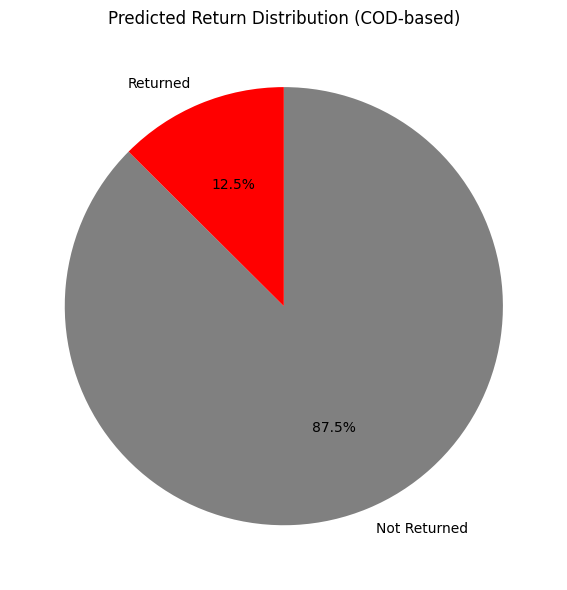

In [31]:
# Predict return based on Payment Method = COD and Returned status
Shipment_dataset['Will Be Returned (Predicted)'] = (
    (Shipment_dataset['Payment Method'] == 'COD') & (Shipment_dataset['Status'] == 'Returned')
)

# Count of True/False predictions
return_counts = Shipment_dataset['Will Be Returned (Predicted)'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    return_counts,
    labels=['Not Returned', 'Returned'] if False in return_counts.index else ['Returned (Predicted)'],
    autopct='%1.1f%%',
    colors=['grey', 'red'],
    startangle=90,
    counterclock=False
)

plt.title("Predicted Return Distribution (COD-based)")
plt.tight_layout()
plt.show()


## 4. Prescriptive Analytics (What should we do?) 

* ### Which shipping mode should be selected to minimize delay and cost?

In [32]:
optimal_mode = Shipment_dataset.groupby('Shipment Mode')[['Delay (hrs)', 'Shipment Cost (in Rs.)']].mean()
print(optimal_mode)

               Delay (hrs)  Shipment Cost (in Rs.)
Shipment Mode                                     
Air              51.341956             1070.189603
Rail             51.672754             1080.927236
Road             51.599435             1072.060931
Sea              52.424258             1074.532625


* ### Should we avoid certain city pairs or companies for high-value items? 

In [33]:
risky_routes = Shipment_dataset[(Shipment_dataset['Total Cost (in Rs.)'] > Shipment_dataset['Total Cost (in Rs.)'].quantile(0.75)) & (Shipment_dataset['Delay (hrs)'] > 0)]
risky_routes_by_company = risky_routes['Company Name'].value_counts().sort_values()
risky_routes_by_city = risky_routes['Route'].value_counts().head(5).sort_values()

print("Companies to be avoided for High Value Items:\n", risky_routes_by_company)
print("\nCity Pairs to be avoided for High Value Items:\n", risky_routes_by_city)

Companies to be avoided for High Value Items:
 Company Name
BlueDart     1208
DHL          1503
UPS          1530
Delhivery    1560
FedEx        1850
Name: count, dtype: int64

City Pairs to be avoided for High Value Items:
 Route
Pune -> Bangalore         100
Bangalore -> Delhi        101
Hyderabad -> Bangalore    101
Mumbai -> Chennai         106
Mumbai -> Ahmedabad       112
Name: count, dtype: int64


* ### How can we optimize the shipment routing strategy? 

In [34]:
top_delay_routes = Shipment_dataset.groupby('Route')['Delay (hrs)'].mean().sort_values(ascending=False).head(5)
print("Top Routes where Delay occurs:\n",top_delay_routes)

Top Routes where Delay occurs:
 Route
Lucknow -> Kolkata     56.301425
Delhi -> Chennai       54.965068
Delhi -> Bangalore     54.734860
Delhi -> Jaipur        54.543716
Jaipur -> Hyderabad    53.680904
Name: Delay (hrs), dtype: float64


* ### Should we prioritize prepaid shipments over COD to reduce returns?

In [35]:
prepaid_ret = Shipment_dataset[(Shipment_dataset['Payment Method'] == 'Prepaid') | (Shipment_dataset['Status'] == 'Returned')]
cod_ret = ship_mode = Shipment_dataset[(Shipment_dataset['Payment Method'] == 'COD') | (Shipment_dataset['Status'] == 'Returned')]

print("Returns on Prepaid Shipment payments:\n", prepaid_ret.__len__())
print("\nReturns on COD Shipment payments:\n",cod_ret.__len__())

Returns on Prepaid Shipment payments:
 20511

Returns on COD Shipment payments:
 20678
